In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 6. Write a script to download TESS lightcurves for a source with a given set of RA/Dec coordinates. You can use “lightkurve” which is a tool used to download TESS and Kepler data. 

In [2]:
"""
Searches and downloads light curve data based on coordinates from NASA's TESS using the lightkurve package.
RA should be between 0 and 360, DEC should be between -90 and 90
"""
def download_TESS_lightcurves(ra, dec, cone_radius):
    sign = ' -' if dec < 0 else ' +'
    coord_string = str(ra % 360) + sign + str(dec)
    search = lk.search_lightcurve(coord_string, radius=cone_radius, mission='TESS')
    light_curves = search.download_all(download_dir="data")
    if light_curves is not None:
        light_curves.plot()
    

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightkurve/c

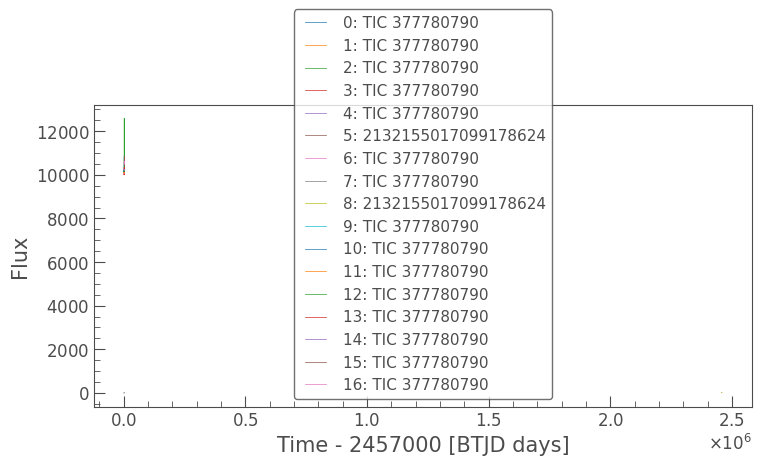

In [3]:
download_TESS_lightcurves(285.67942179, 50.24130576, 0.0001)